DATA KAGGLE:
https://www.kaggle.com/datasets/carrie1/ecommerce-data

In [1]:
# Tahap 1: Import Library
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv('/content/drive/MyDrive/pembelajaran mesin/UAS/proyek 3 clustering (unsupervised)/data.csv', encoding='ISO-8859-1')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
data.dropna(inplace=True)
df = data[(data['Quantity'] > 0) & (data['UnitPrice'] > 0)]

In [4]:
# Hapus null dan data retur (Quantity negatif)
data.dropna(inplace=True)
data = data[(data['Quantity'] > 0) & (data['UnitPrice'] > 0)]

print("Data Setelah Dibersihkan:")
data.head()


Data Setelah Dibersihkan:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']

print("Data dengan Kolom TotalPrice:")
data[['CustomerID', 'InvoiceNo', 'Quantity', 'UnitPrice', 'TotalPrice']].head()


Data dengan Kolom TotalPrice:


,CustomerID,InvoiceNo,Quantity,UnitPrice,TotalPrice
0,17850.0,536365,6,2.55,15.30
1,17850.0,536365,6,3.39,20.34
2,17850.0,536365,8,2.75,22.00
3,17850.0,536365,6,3.39,20.34
4,17850.0,536365,6,3.39,20.34


In [6]:
customer_df = data.groupby('CustomerID').agg({
    'InvoiceNo': 'nunique',
    'Quantity': 'sum',
    'TotalPrice': 'sum'
}).reset_index()

customer_df.columns = ['CustomerID', 'NumTransactions', 'TotalQuantity', 'TotalSpending']

print("Data Hasil Agregasi per CustomerID:")
customer_df.head()


Data Hasil Agregasi per CustomerID:


,CustomerID,NumTransactions,TotalQuantity,TotalSpending
0,12346.0,1,74215,77183.60
1,12347.0,7,2458,4310.00
2,12348.0,4,2341,1797.24
3,12349.0,1,631,1757.55
4,12350.0,1,197,334.40


In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(customer_df[['NumTransactions', 'TotalQuantity', 'TotalSpending']])

print("Hasil Normalisasi (standarisasi):")
print(X_scaled[:5])


Hasil Normalisasi (standarisasi):
[[-0.4250965  14.47303784  8.35866818]
 [ 0.3544168   0.25105757  0.25096626]
 [-0.03533985  0.22786859 -0.02859601]
 [-0.4250965  -0.11104729 -0.0330118 ]
 [-0.4250965  -0.19706453 -0.19134727]]


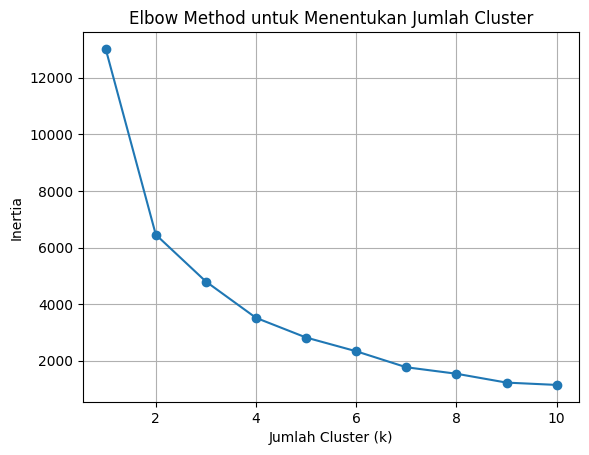

In [9]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title("Elbow Method untuk Menentukan Jumlah Cluster")
plt.xlabel("Jumlah Cluster (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()


In [10]:
kmeans = KMeans(n_clusters=2, random_state=42)
customer_df['Cluster'] = kmeans.fit_predict(X_scaled)

print("Data Pelanggan dengan Label Cluster:")
customer_df.head()


Data Pelanggan dengan Label Cluster:


,CustomerID,NumTransactions,TotalQuantity,TotalSpending,Cluster
0,12346.0,1,74215,77183.60,1
1,12347.0,7,2458,4310.00,0
2,12348.0,4,2341,1797.24,0
3,12349.0,1,631,1757.55,0
4,12350.0,1,197,334.40,0


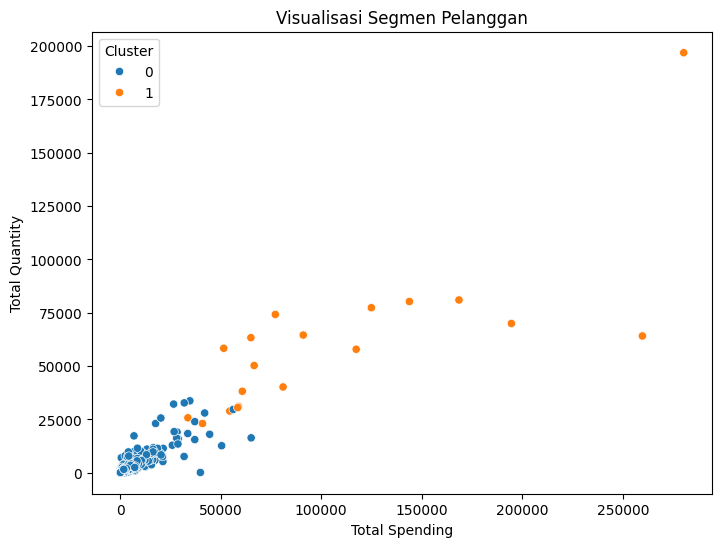

In [11]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=customer_df,
    x='TotalSpending',
    y='TotalQuantity',
    hue='Cluster',
    palette='tab10'
)
plt.title("Visualisasi Segmen Pelanggan")
plt.xlabel("Total Spending")
plt.ylabel("Total Quantity")
plt.show()
